In [26]:
import pandas as pd
import numpy as np
import seaborn as sns


df = pd.read_csv("burma14extend.csv")
clean = df.dropna()
clean.loc[:,'delta'] = clean.loc[:,'distance'] - 3323
clean.loc[:,'%delta'] = clean.loc[:,'delta']/3323
#clean.describe()


/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/salesbarbosa/anaconda3/lib/python3.4/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


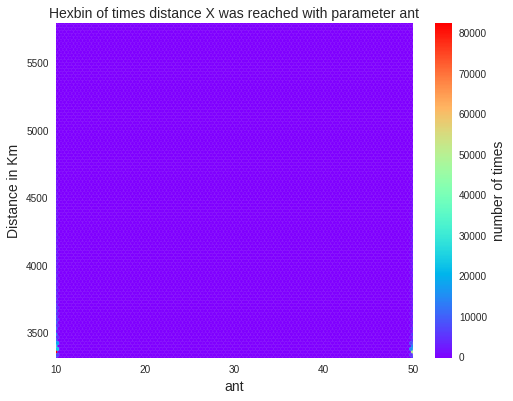

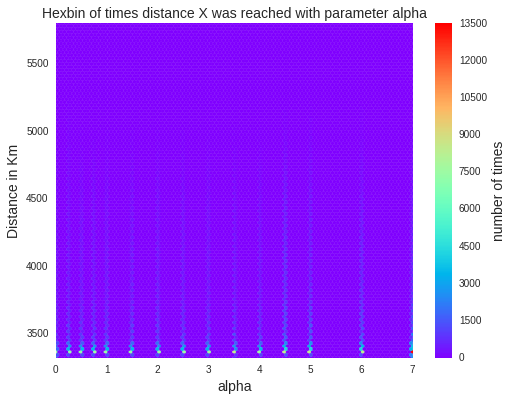

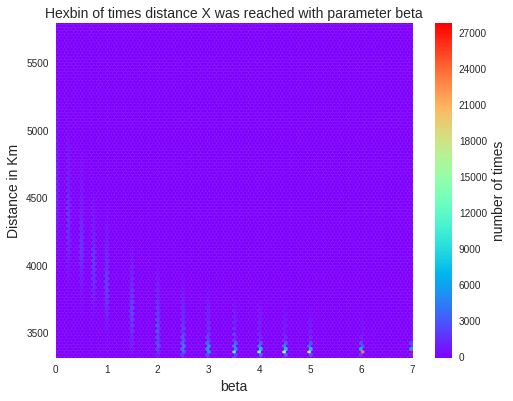

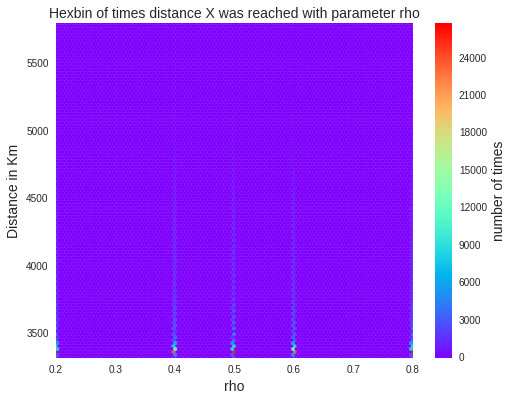

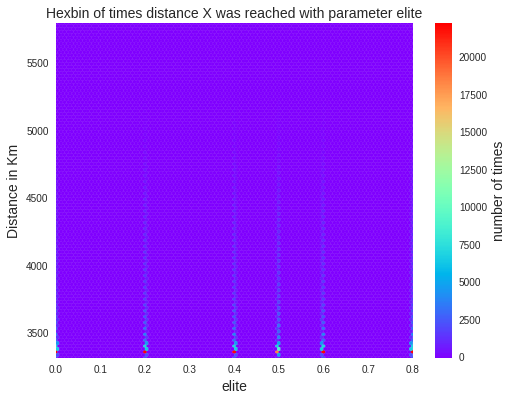

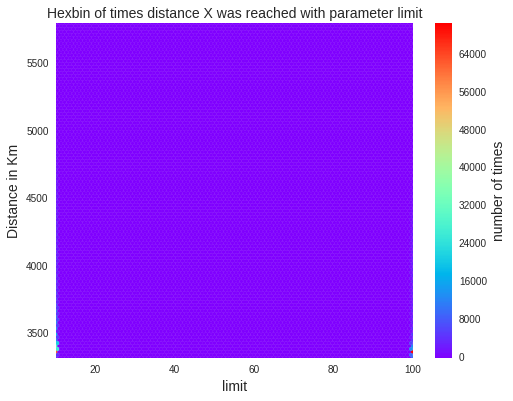

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

for name in clean.columns:
    if name in ['distance','ID','delta','%delta'] :
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    d = ax.hexbin(clean[name],clean['distance'], cmap=plt.cm.rainbow)
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Hexbin of times distance X was reached with parameter '+name,fontsize=14)
    cb = fig.colorbar(d)
    cb.set_label('number of times',fontsize=14)
    fig.savefig('img/plot_hexbin_'+name+'.png')


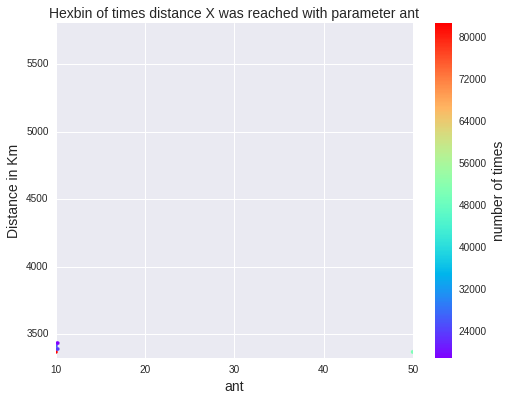

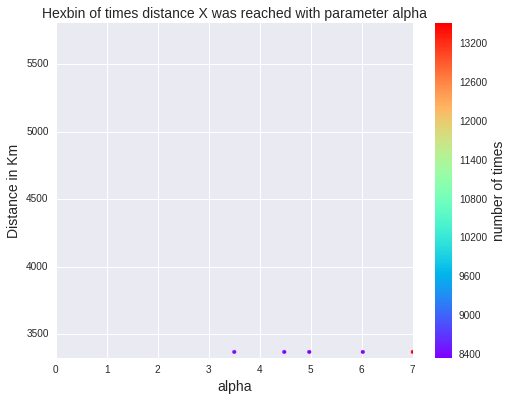

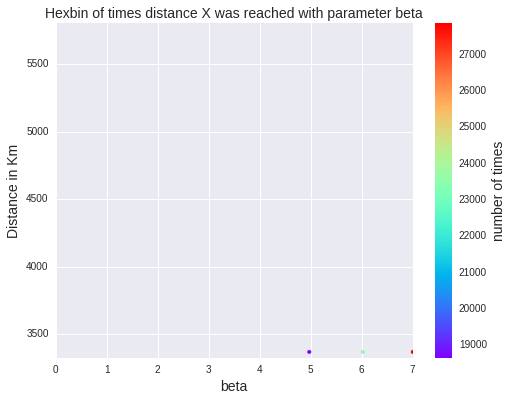

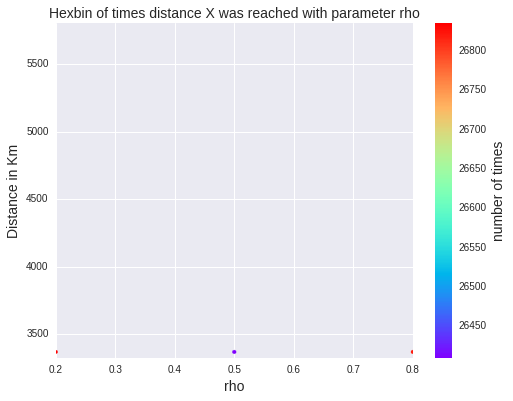

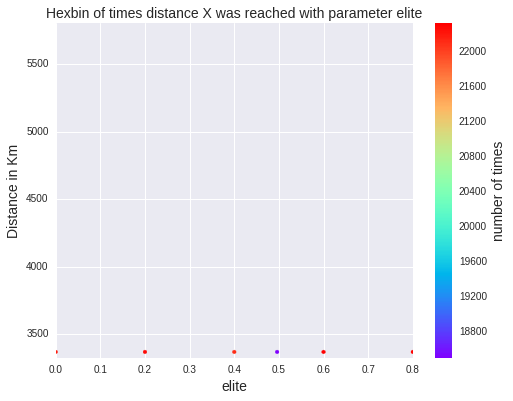

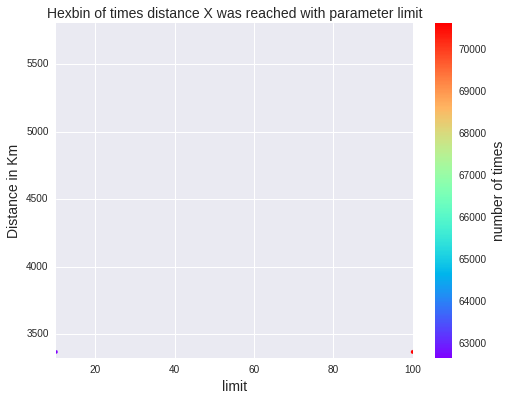

In [29]:
for name in clean.columns:
    if name in ['distance','ID','delta','%delta'] :
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    if name == 'alpha':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=8000, cmap=plt.cm.rainbow)
    elif name == 'rho':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=25000, cmap=plt.cm.rainbow)
    elif name == 'limit':
        d = ax.hexbin(clean[name],clean['distance'],mincnt=48000, cmap=plt.cm.rainbow)
    else:
        d = ax.hexbin(clean[name],clean['distance'],mincnt=18000, cmap=plt.cm.rainbow)
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Hexbin of times distance X was reached with parameter '+name,fontsize=14)
    cb = fig.colorbar(d)
    cb.set_label('number of times',fontsize=14)
    fig.savefig('img/plot_hexbin_10k_'+name+'.png')

C(Q('beta'))[0.0]     4689.728177
C(Q('beta'))[0.25]    4456.251725
C(Q('beta'))[0.5]     4253.640035
C(Q('beta'))[0.75]    4083.388495
C(Q('beta'))[1.0]     3943.412365
C(Q('beta'))[1.5]     3744.356720
C(Q('beta'))[2.0]     3623.280646
C(Q('beta'))[2.5]     3551.341749
C(Q('beta'))[3.0]     3507.464616
C(Q('beta'))[3.5]     3479.685616
C(Q('beta'))[4.0]     3462.331927
C(Q('beta'))[4.5]     3449.854281
C(Q('beta'))[5.0]     3442.295028
C(Q('beta'))[6.0]     3431.674461
C(Q('beta'))[7.0]     3426.487545
C(Q('ant'))[T.50]      -99.052202
dtype: float64
C(Q('beta'))[0.0]     0
C(Q('beta'))[0.25]    0
C(Q('beta'))[0.5]     0
C(Q('beta'))[0.75]    0
C(Q('beta'))[1.0]     0
C(Q('beta'))[1.5]     0
C(Q('beta'))[2.0]     0
C(Q('beta'))[2.5]     0
C(Q('beta'))[3.0]     0
C(Q('beta'))[3.5]     0
C(Q('beta'))[4.0]     0
C(Q('beta'))[4.5]     0
C(Q('beta'))[5.0]     0
C(Q('beta'))[6.0]     0
C(Q('beta'))[7.0]     0
C(Q('ant'))[T.50]     0
dtype: float64
 
spearman correlation distance and ant -0

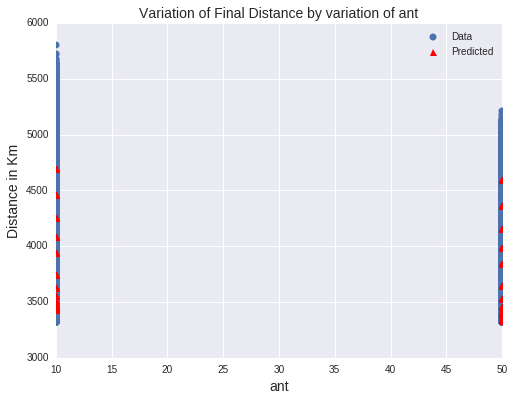

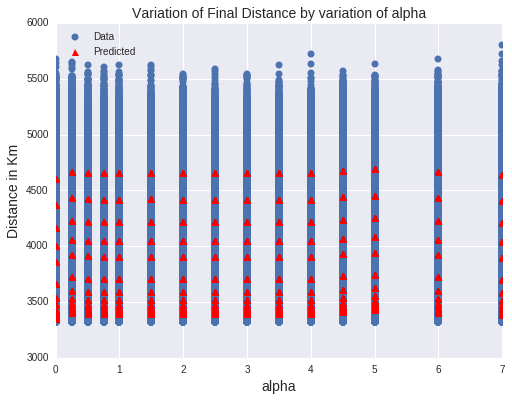

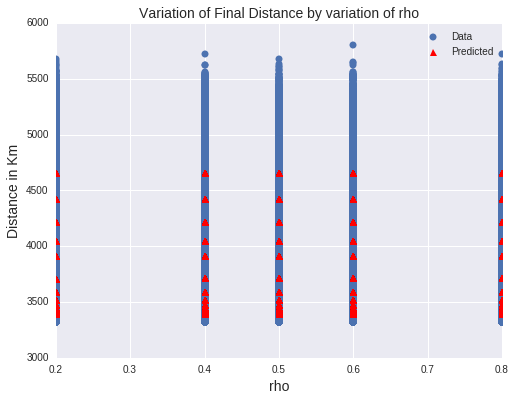

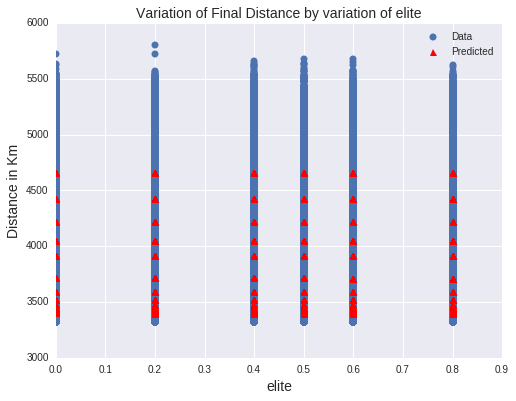

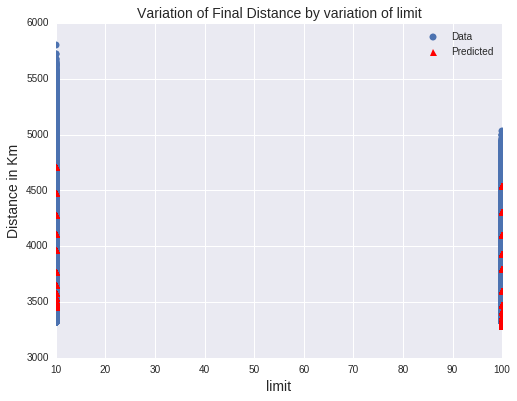

In [30]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

t = []
for name in clean.columns:
    if name in ['distance','ID','beta','delta','%delta'] :
        continue
    
    #formula = "Q('distance') ~ np.exp(Q('beta')) + C(Q('"+name+"'))"
    formula = "Q('distance') ~ C(Q('beta')) + C(Q('"+name+"')) -1"
    model = smf.ols(formula,data=clean)
    if model.nobs < len(clean)/2:
        continue
        
    results = model.fit()
        
    t.append((results.rsquared, name))
    print(results.params)
    print(results.pvalues)
    print(' ')
    print('spearman correlation distance and '+name,clean[name].corr(clean['distance'],method='spearman'))
    print('pearson correlation distance and '+name,clean[name].corr(clean['distance'],method='pearson'))
    print(' ')
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(clean[name], clean['distance'], 'o', label="Data")
    ax.plot(clean[name], results.fittedvalues, '^r', label="Predicted")
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Variation of Final Distance by variation of '+name,fontsize=14)
    plt.grid(True)
    legend = ax.legend(loc="best")
    fig.savefig('plot_'+name+'.png')
    
    
t.sort(reverse=True)
for mse,name in t:
    print(name,mse)

In [31]:
import statsmodels.formula.api as smf
formula1 = 'distance ~ C(beta)-1'
formula2 = 'distance ~ C(beta)+C(ant)-1'
formula3 = 'distance ~ C(beta)+C(limit)-1'
formula4 = 'distance ~ C(beta)+C(limit)+C(ant)-1'
formula5 = 'distance ~ C(beta)+C(limit)+C(ant)+C(alpha)-1'
formula6 = 'distance ~ C(beta)+C(limit)+C(ant)+C(rho)-1'
formula7 = 'distance ~ C(beta)+C(limit)+C(ant)+C(elite)-1'

formulas = [formula1,formula2,formula3,formula4,formula5,formula6,formula7]
t = []
models = {}
for formula in formulas:
    model = smf.ols(formula,data=clean)
    results = model.fit()
        
    t.append((results.rsquared, formula))
    models[formula] = results
    
t.sort(reverse=True)
for mse,formula in t:
    diff = mse - t[6][0]
    print(formula,mse*100,diff*100)

distance ~ C(beta)+C(limit)+C(ant)+C(alpha)-1 89.0318256093 7030.27857996
distance ~ C(beta)+C(limit)+C(ant)+C(rho)-1 89.0172888588 7030.26404321
distance ~ C(beta)+C(limit)+C(ant)-1 89.0172646967 7030.26401905
distance ~ C(beta)+C(limit)-1 86.1505710345 7027.39732539
distance ~ C(beta)+C(ant)-1 83.9886859166 7025.23544027
distance ~ C(beta)-1 82.9213165513 7024.1680709
distance ~ C(beta)+C(limit)+C(ant)+C(elite)-1 -6941.24675435 0.0


In [17]:
models[formula1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 2.465e+05
Date:                Sun, 07 Feb 2016   Prob (F-statistic):               0.00
Time:                        14:54:41   Log-Likelihood:            -4.4576e+06
No. Observations:              672625   AIC:                         8.915e+06
Df Residuals:                  672610   BIC:                         8.915e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
C(beta)[0.0]   4672.2915      0.821   5689.382      0.000      4670.682  4673.901
C(beta)[0.25]  4435.7913      0.852   5203.451      0.000      4434.121  4437.462
C(beta)[0.5]   4231.9275      0.853   4960.579      0.000      4230.255  4233.600
C(beta)[0.75]  4056.9478      0.853   4755.471      0.000      4055.276  4058.620
C(beta)[1.0]   3915.0339      0.853   4589.123      0.000      3913.362  3916.706
C(beta)[1.5]   3716.2100      0.860   4318.847      0.000      3714.524  3717.896
C(beta)[2.0]   3594.5695      0.864   4160.595      0.000      3592.876  3596.263
C(beta)[2.5]   3522.8155      0.870   4047.595      0.000      3521.110  3524.521
C(beta)[3.0]   3478.2238      0.870   3996.360      0.000      3476.518  3479.930
C(beta)[3.5]   3449.9674      0.870   3963.895      0.000      3448.262  3451.673
C(beta)[4.0]   3432.2446      0.870   3943.532      0.000      3430.539  3433.950
C(beta)[4.5]   3420.3865      0.876   3905.279      0.000      3418.670  3422.103
C(beta)[5.0]   3413.1706      0.879   3881.394      0.000      3411.447  3414.894
C(beta)[6.0]   3402.2509      0.879   3868.976      0.000      3400.527  3403.974
C(beta)[7.0]   3396.8541      0.879   3862.839      0.000      3395.131  3398.578
==============================================================================
Omnibus:                    50659.498   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148967.729
Skew:                           0.402   Prob(JB):                         0.00
Kurtosis:                       5.161   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
models[formula4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 3.488e+05
Date:                Sun, 07 Feb 2016   Prob (F-statistic):               0.00
Time:                        14:54:42   Log-Likelihood:            -4.3176e+06
No. Observations:              672625   AIC:                         8.635e+06
Df Residuals:                  672608   BIC:                         8.635e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
C(beta)[0.0]     4798.5715      0.702   6832.157      0.000      4797.195  4799.948
C(beta)[0.25]    4566.5513      0.729   6266.727      0.000      4565.123  4567.979
C(beta)[0.5]     4362.8840      0.729   5982.299      0.000      4361.455  4364.313
C(beta)[0.75]    4187.9043      0.729   5742.371      0.000      4186.475  4189.334
C(beta)[1.0]     4045.9904      0.729   5547.781      0.000      4044.561  4047.420
C(beta)[1.5]     3846.3880      0.734   5238.237      0.000      3844.949  3847.827
C(beta)[2.0]     3724.3755      0.737   5055.660      0.000      3722.932  3725.819
C(beta)[2.5]     3651.9364      0.741   4927.993      0.000      3650.484  3653.389
C(beta)[3.0]     3607.3446      0.741   4867.820      0.000      3605.892  3608.797
C(beta)[3.5]     3579.0883      0.741   4829.691      0.000      3577.636  3580.541
C(beta)[4.0]     3561.3655      0.741   4805.775      0.000      3559.913  3562.818
C(beta)[4.5]     3545.9987      0.744   4769.235      0.000      3544.541  3547.456
C(beta)[5.0]     3536.5143      0.745   4746.202      0.000      3535.054  3537.975
C(beta)[6.0]     3525.5946      0.745   4731.547      0.000      3524.134  3527.055
C(beta)[7.0]     3520.1977      0.745   4724.304      0.000      3518.737  3521.658
C(limit)[T.100]  -230.4995      0.422   -546.224      0.000      -231.327  -229.672
C(ant)[T.50]     -175.9288      0.423   -415.535      0.000      -176.759  -175.099
==============================================================================
Omnibus:                    41313.349   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176310.685
Skew:                          -0.131   Prob(JB):                         0.00
Kurtosis:                       5.494   Cond. No.                         3.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
models[formula5].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               distance   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.861e+05
Date:                Sun, 07 Feb 2016   Prob (F-statistic):               0.00
Time:                        14:54:45   Log-Likelihood:            -4.3175e+06
No. Observations:              672625   AIC:                         8.635e+06
Df Residuals:                  672594   BIC:                         8.635e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
C(beta)[0.0]      4807.5792      1.018   4724.116      0.000      4805.585  4809.574
C(beta)[0.25]     4576.1879      1.059   4321.630      0.000      4574.112  4578.263
C(beta)[0.5]      4372.5295      1.059   4127.715      0.000      4370.453  4374.606
C(beta)[0.75]     4197.5499      1.059   3962.532      0.000      4195.474  4199.626
C(beta)[1.0]      4055.6359      1.059   3828.564      0.000      4053.560  4057.712
C(beta)[1.5]      3855.9760      1.062   3630.584      0.000      3853.894  3858.058
C(beta)[2.0]      3733.9359      1.063   3511.190      0.000      3731.852  3736.020
C(beta)[2.5]      3661.4461      1.066   3434.776      0.000      3659.357  3663.535
C(beta)[3.0]      3616.8544      1.066   3392.945      0.000      3614.765  3618.944
C(beta)[3.5]      3588.5980      1.066   3366.438      0.000      3586.509  3590.687
C(beta)[4.0]      3570.8752      1.066   3349.812      0.000      3568.786  3572.965
C(beta)[4.5]      3555.6100      1.074   3311.318      0.000      3553.505  3557.715
C(beta)[5.0]      3546.1911      1.079   3287.068      0.000      3544.077  3548.306
C(beta)[6.0]      3535.2714      1.079   3276.946      0.000      3533.157  3537.386
C(beta)[7.0]      3529.8745      1.079   3271.944      0.000      3527.760  3531.989
C(limit)[T.100]   -231.6189      0.431   -537.140      0.000      -232.464  -230.774
C(ant)[T.50]      -176.2982      0.427   -413.240      0.000      -177.134  -175.462
C(alpha)[T.0.25]    -3.7069      1.046     -3.543      0.000        -5.757    -1.656
C(alpha)[T.0.5]     -8.3701      1.057     -7.916      0.000       -10.443    -6.298
C(alpha)[T.0.75]    -9.9496      1.057     -9.410      0.000       -12.022    -7.877
C(alpha)[T.1.0]     -9.4368      1.057     -8.925      0.000       -11.509    -7.364
C(alpha)[T.1.5]     -8.7222      1.057     -8.249      0.000       -10.795    -6.650
C(alpha)[T.2.0]     -9.4419      1.057     -8.929      0.000       -11.514    -7.369
C(alpha)[T.2.5]     -9.6803      1.057     -9.155      0.000       -11.753    -7.608
C(alpha)[T.3.0]     -9.7406      1.057     -9.212      0.000       -11.813    -7.668
C(alpha)[T.3.5]    -10.3977      1.057     -9.833      0.000       -12.470    -8.325
C(alpha)[T.4.0]     -9.6902      1.057     -9.164      0.000       -11.763    -7.618
C(alpha)[T.4.5]    -12.6031      0.964    -13.071      0.000       -14.493   -10.713
C(alpha)[T.5.0]     -9.8132      0.998     -9.833      0.000       -11.769    -7.857
C(alpha)[T.6.0]    -10.8340      0.998    -10.856      0.000       -12.790    -8.878
C(alpha)[T.7.0]    -10.5286      0.998    -10.550      0.000       -12.485    -8.573
==============================================================================
Omnibus:                    41353.746   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.0

Results for exp beta
C(Q('beta'))[0.0]        4619.104312
C(Q('beta'))[0.25]       4380.253323
C(Q('beta'))[0.5]        4176.395004
C(Q('beta'))[0.75]       4001.415331
C(Q('beta'))[1.0]        3859.501366
C(Q('beta'))[1.5]        3660.872590
C(Q('beta'))[2.0]        3539.325392
C(Q('beta'))[2.5]        3467.743069
C(Q('beta'))[3.0]        3423.151300
C(Q('beta'))[3.5]        3394.894906
C(Q('beta'))[4.0]        3377.172117
C(Q('beta'))[4.5]        3364.617198
C(Q('beta'))[5.0]        3356.950818
C(Q('beta'))[6.0]        3346.031142
C(Q('beta'))[7.0]        3340.634244
C(Q('alpha'))[T.0.25]      59.198425
C(Q('alpha'))[T.0.5]       48.727686
C(Q('alpha'))[T.0.75]      47.148254
C(Q('alpha'))[T.1.0]       47.661044
C(Q('alpha'))[T.1.5]       48.375588
C(Q('alpha'))[T.2.0]       47.655933
C(Q('alpha'))[T.2.5]       47.417563
C(Q('alpha'))[T.3.0]       47.357217
C(Q('alpha'))[T.3.5]       46.700106
C(Q('alpha'))[T.4.0]       47.407588
C(Q('alpha'))[T.4.5]       66.803699
C(Q('alpha'))[T.5

TypeError: 'int' object is not iterable

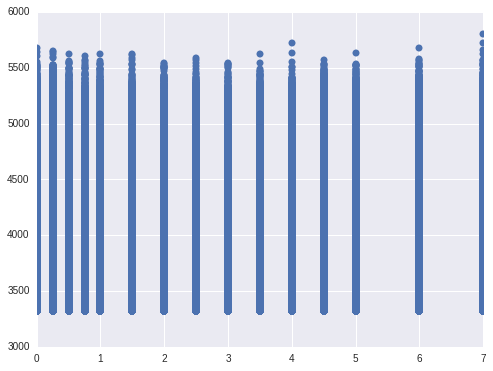

In [186]:

formula = "Q('delta') ~ np.exp(Q('beta'))"
formula = "Q('distance') ~ (C(Q('beta')) - 1) + (C(Q('alpha')) - 1)"

model = smf.ols(formula,data=clean)
results = model.fit()

print('Results for exp beta')
print(results.params)
#print(results.rsquared)
#print(results.pvalues)
print(' ')
print('spearman correlation distance and exp(beta)',np.exp(clean['beta']).corr(clean['distance'],method='spearman'))
print(' ')

betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alpha = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
beta = [(beta,i) for beta in betas for i in alpha]
    
df = pd.DataFrame(beta, columns=['beta','alpha'])
df.head(5)
x = df.loc[df.loc[:,'beta']==0]
print(results.predict(x))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(clean['alpha'], clean['distance'], 'o', label="Data")
for i in alpha:
    x = df.loc[df.loc[:,'beta']==i]
    ax.plot(x['alpha'],results.predict(x) , '^', label="Predicted")
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="best")
fig.savefig('plot_exp(beta).png')


[  1.33188041e+03  -7.61650208e-01]


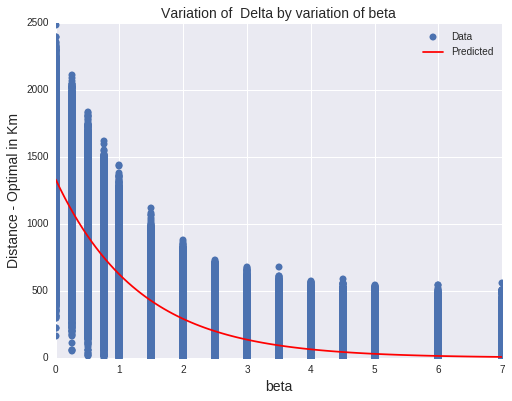

In [273]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.exp(b * x)

#p0 = [1292.45,-0.904,71,31]
p0 = [1331.88,-0.762]
#xdata['beta'] = clean[:,'beta':'beta']
#xdata['limit'] = clean.limit.copy()
popt, pcov = curve_fit(func, clean['beta'],clean['delta'],p0=p0 )
print(popt)

x = np.linspace(0,7,100)
y = func(x, *popt)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(clean['beta'],clean['delta'],'o',label='Data')
plt.plot(x,y,'r',label='Predicted')
plt.xlabel('beta',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of beta',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="best")
#plt.savefig('reg_beta_delta.png')


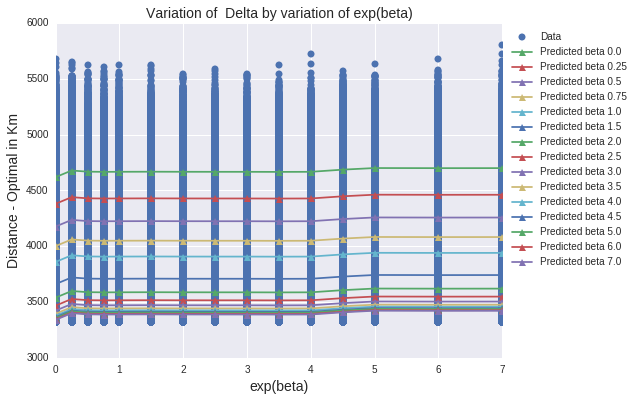

In [202]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(clean['alpha'], clean['distance'], 'o', label="Data")
for beta in betas:
    x = df.loc[df.loc[:,'beta']==beta]
    ax.plot(x['alpha'],results.predict(x) , '^-', label="Predicted beta "+str(beta))
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
fig.savefig('plot_alpha_beta.png')

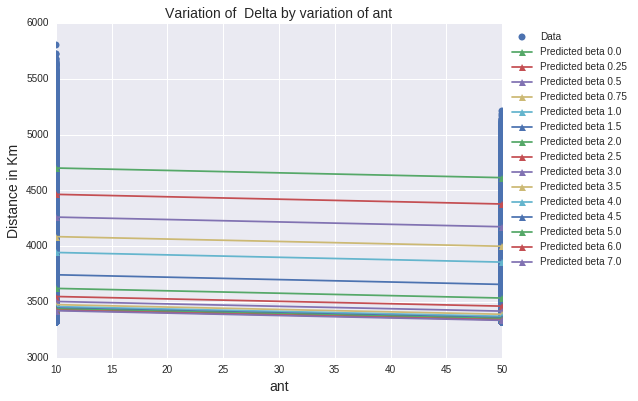

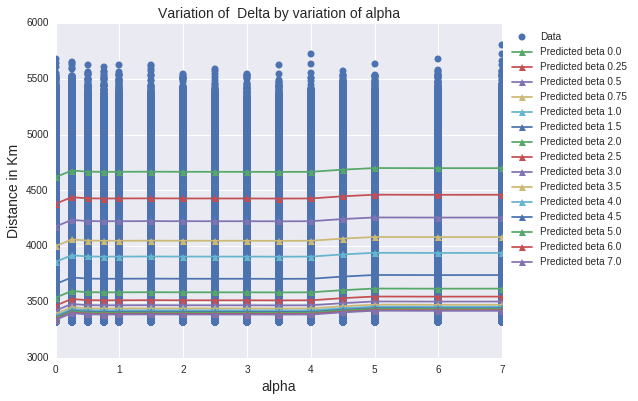

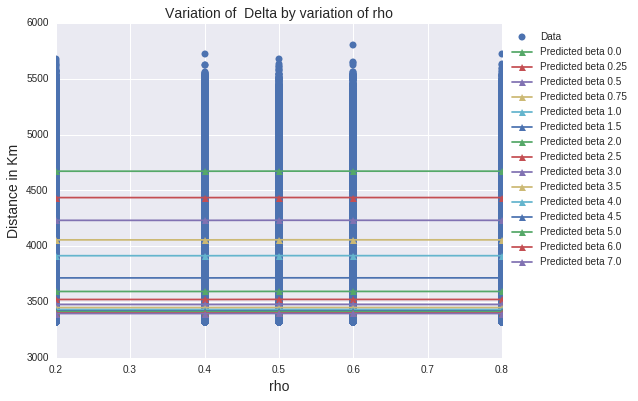

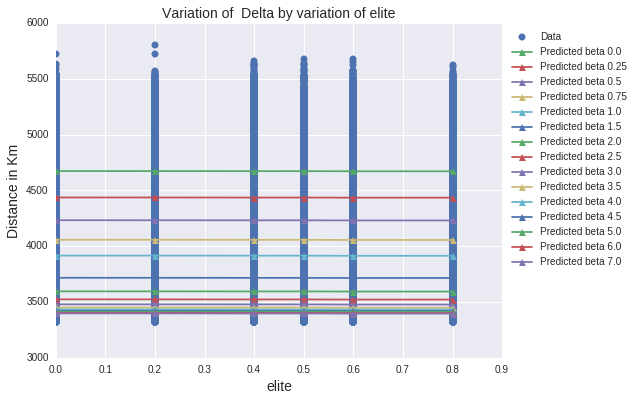

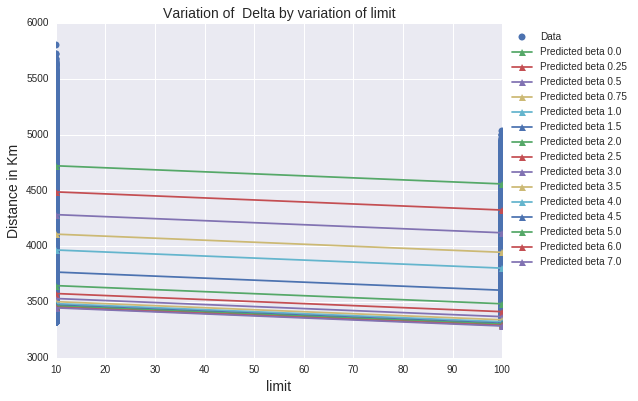

In [5]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alphas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
ants = np.array((10,50))
limits = np.array((10,100))
rhos = np.array((0.2,0.4,0.5,0.6,0.8))
elites = np.array((0,0.2,0.4,0.5,0.6,0.8))

alpha = [(beta,i) for beta in betas for i in alphas]
ant = [(beta,i) for beta in betas for i in ants]
limit = [(beta,i) for beta in betas for i in limits]
rho = [(beta,i) for beta in betas for i in rhos]
elite = [(beta,i) for beta in betas for i in elites]




dfs = {'alpha':alpha,'ant':ant,'limit':limit,'rho':rho,'elite':elite}

for name in clean.columns:
    if name in ['distance','ID','beta','delta','%delta'] :
        continue
    
    #formula = "Q('distance') ~ np.exp(Q('beta')) + C(Q('"+name+"'))"
    formula = "Q('distance') ~ C(Q('beta')) + C(Q('"+name+"'))"
    model = smf.ols(formula,data=clean)     
    results = model.fit()
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(clean[name], clean['distance'], 'o', label="Data")
    
    df = pd.DataFrame(dfs[name], columns=['beta',name])
    for i in betas:
        x = df.loc[df.loc[:,'beta']==i]
        ax.plot(x[name],results.predict(x) , '^-', label="Predicted beta "+str(i))
    plt.xlabel(name,fontsize=14)
    plt.ylabel('Distance in Km',fontsize=14)
    plt.title('Variation of  Delta by variation of '+name,fontsize=14)
    plt.grid(True)
    legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
    fig.savefig('plot_'+name+'_beta.png')


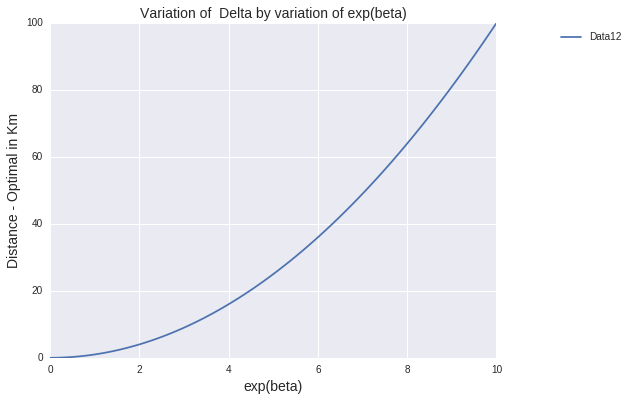

In [198]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(0,10,100)
y = x**2
ax.plot(x,y, '-', label="Data"+str(12))
plt.xlabel('exp(beta)',fontsize=14)
plt.ylabel('Distance - Optimal in Km',fontsize=14)
plt.title('Variation of  Delta by variation of exp(beta)',fontsize=14)
plt.grid(True)
legend = ax.legend(loc="upper right",bbox_to_anchor=(1.3, 1.0))
fig.savefig('plot_exp(beta).png')

In [279]:
betas = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
alpha = np.array((0,0.25,0.5,0.75,1,1.5,2,2.5,3,3.5,4,4.5,5,6,7))
beta = [(beta,i) for beta in betas for i in alpha]

j = {'beta':betas,'alpha':alpha}

#df = pd.DataFrame(beta, columns=['beta','alpha'])
#df.head(5)
#x = df.loc[df.loc[:,'beta']==0]

clean.iloc[672290]

ID            12.000000
ant           50.000000
alpha          0.000000
beta           0.000000
rho            0.200000
elite          0.000000
limit        100.000000
distance    4318.000000
delta        995.000000
%delta         0.299428
Name: 694696, dtype: float64